## Kütüphanelerin Aktarılması

In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,AveragePooling2D, MaxPool2D
from keras.layers import Input, Add,Activation, BatchNormalization
from tensorflow.keras.utils import plot_model
from keras.layers.merge import concatenate

# AlexNet 

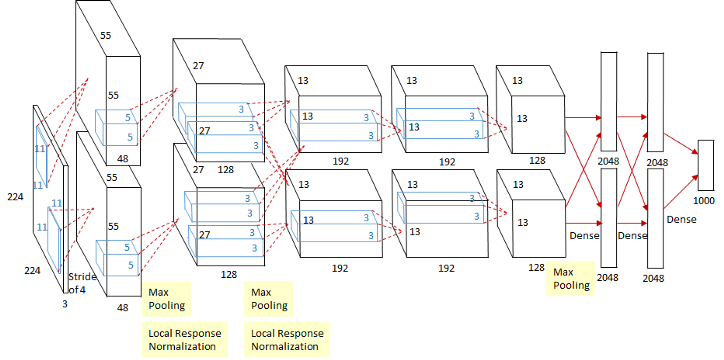

In [ ]:
# "valid" means no padding
#padding='Same' in Keras means padding is added as required to make up 
#for overlaps when the input size and kernel size do not perfectly fit.
def AlexNet(class_size):
    
    model = Sequential(name='AlexNet')
    #1 conv layer
    model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding= 'valid',activation="relu",input_shape=(224,224,3)))
    #1 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(BatchNormalization())
    
    #2 conv layer
    model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',activation="relu"))
    #2 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(BatchNormalization())
    
    #3 conv layer
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu"))
    #4 conv layer
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu"))
    #5 conv layer
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu"))
    #3 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    model.add(Flatten())
    #1 dense layer
    model.add(Dense(4096,activation="relu"))
    model.add(Dropout(0.4)) # Add Dropout to prevent overfitting
    #2 dense layer
    model.add(Dense(4096,activation="relu"))
    model.add(Dropout(0.4))
    #output layer
    model.add(Dense(class_size,activation="softmax"))
    
    return model

In [ ]:
def AlexNet2(class_size):
    
    model = Sequential(name='AlexNet2')
    #1 conv layer
    model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding= 'valid',activation="relu",input_shape=(224,224,3)))
    #1 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(BatchNormalization())
    
    #2 conv layer
    model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='valid',activation="relu"))
    #2 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(BatchNormalization())
    
    #3 conv layer
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
    #4 conv layer
    model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
    #5 conv layer
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu"))
    #3 max pool layer
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    model.add(Flatten())
    #1 dense layer
    model.add(Dense(4096,activation="relu"))
    model.add(Dropout(0.3)) # Add Dropout to prevent overfitting
    #2 dense layer
    model.add(Dense(4096,activation="relu"))
    model.add(Dropout(0.5))
    #output layer
    model.add(Dense(class_size,activation="softmax"))
    
    return model

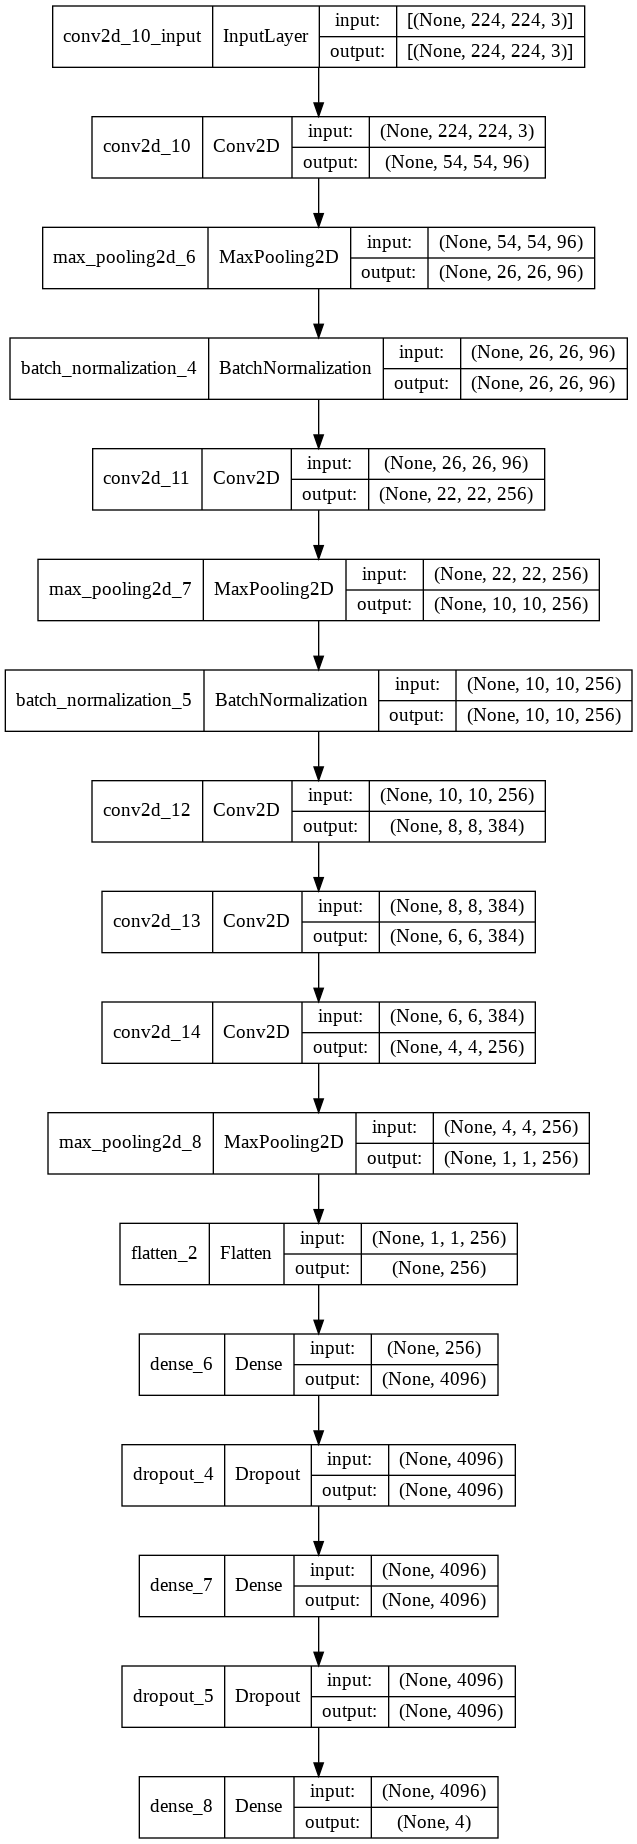

In [ ]:
#alexnet=AlexNet2(4)
#plot_model(alexnet, to_file='alexnet_model2_plot.png', show_shapes=True, show_layer_names=True)

#ResNet50


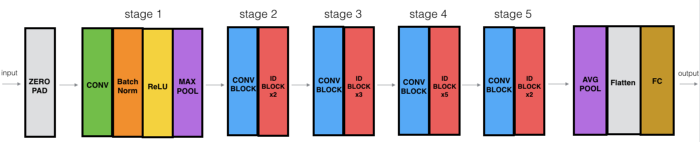

In [ ]:
# pip install Keras-Applications

In [ ]:
from tensorflow.keras.applications import ResNet50

Öğrenme aktarımı (transfer learning) ve ince ayar (fine-tuning) yöntemlerinden faydalanarak daha önceden eğitilmiş bir modeli kendi veri setimiz için tekrar eğitme

Çıktı katmanı ImageNet sınıflandırmasına göre özelleştirildiği için bu katmanı dahil etmiyorum (includetop=false). (model2) Modelin sonuna ortalama ortaklama (average-pooling) katmanı ve softmax katmanı eklendi.

Resnet modeli 2 adet (3x3) evrişim kullanmak yerine (1x1), (3x3), (1x1) şeklinde evrişim katmanları kullanır.

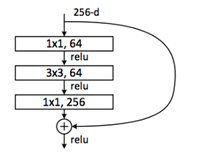

In [ ]:
def ResNet50_model3(class_size):
  input_tensor = Input(shape=(224, 224, 3))
  # create the base pre-trained model
  base_model = ResNet50(weights= None, include_top=False, input_shape= (224, 224, 3)) # weights=None ; rastgele ağırlıklar ile başlatalım

  x = base_model.output
  x = GlobalAveragePooling2D(data_format='channels_last')(x)
  predictions = Dense(class_size, activation= 'softmax')(x)

  model = Model(inputs = base_model.input, outputs = predictions)

  return  model

In [ ]:
#resnet_model2 = ResNet50_model2(4)
#plot_model(resnet_model2, to_file='resnet50_model3_plot.png', show_shapes=True, show_layer_names=True)

# VGG16

In [ ]:
def VGG16(class_size):
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=class_size, activation="softmax"))

  return model

In [ ]:
#model=VGG16(4)
#model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

# VGG19